In [1]:
import pandas as pd
import re

In [2]:
import networkx as nx

In [3]:
G = nx.MultiDiGraph()

In [5]:
!pip install openpyxl

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [openpyxl]


In [6]:
file_path = 'Liguori_German_updated.xlsx'
df = pd.read_excel(file_path)

In [5]:
df

,Year,Subsequent Years,Digitized,Editions,Title,Publisher,Translator,Place,Full Title,Approbation,Notes,Country
0,1842.0,"1843-1846, 1847-86",https://www.google.ie/books/edition/Sämmtliche...,45.0,Sämmtliche Werke,Manz,Hugues,Ratisbonne,NaN,NaN,NaN,Germany
1,1844.0,NaN,https://www.google.ie/books/edition/Sämmtliche...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1844.0,NaN,https://www.google.ie/books/edition/Sämmtliche...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,vol. 7,NaN
3,1840.0,NaN,NaN,1.0,Kurze Betrachtungen auf alle Tage der Woche. E...,Cremer,NaN,Aix-la-Chapelle,Kurze Betrachtungen auf alle Tage der Woche. E...,NaN,NaN,Germany
4,1841.0,NaN,NaN,1.0,Kurze Betrachtungen auf alle Tage der Woche. E...,Walter,NaN,Dresden,NaN,NaN,NaN,Germany
...,...,...,...,...,...,...,...,...,...,...,...,...
345,1893.0,NaN,NaN,NaN,Briefe des heiligen Kirchenlehrers,NaN,NaN,NaN,Briefe des heiligen Kirchenlehrers Alfons Mari...,NaN,NaN,Germany
346,1894.0,NaN,https://www.google.ie/books/edition/Briefe_des...,NaN,Briefe des heiligen Kirchenlehrers,Manz,NaN,Ratisbonne,NaN,NaN,NaN,Germany
347,1894.0,NaN,NaN,NaN,Das große Gnadenmittel des Gebetes,Pustet,NaN,Ratisbonne,Das große Gnadenmittel des Gebetes,NaN,NaN,Germany
348,1898.0,NaN,https://books.google.ie/books?id=xo36jZasklgC&...,NaN,Leben des heiligen,Pustet,NaN,Ratisbonne ; New York ; Cincinnati,Leben des heiligen Bischofs und Kirchenlehrers...,NaN,NaN,Germany ; USA


In [5]:

unique_publishers = set()


for publisher_entry in df['Publisher']:
    if pd.notna(publisher_entry):  # Ignore NaN values
        # Split by semicolon, clean spaces, and add each publisher separately
        # publishers = [pub.strip() for pub in str(publisher_entry).split(';') if pub.strip() and if 'Cía' not in pub.strip()]
        # publishers = [pub.strip() for pub in str(publisher_entry).split(';') if pub.strip()
        unique_publishers.add(str(publisher_entry))

In [6]:

for publisher in unique_publishers:
    G.add_node(publisher, publications=[])

In [7]:
unique_publishers

{'Alberts',
 'Alphonsusbuchhandl',
 'Aschendorff',
 'Barth',
 'Benziger',
 'Bonifaciusdruck',
 'Brzezowsky',
 'Bucher',
 'Bück',
 'Collignon',
 'Cordier',
 'Cremer',
 'Deckherr',
 'Eberle & Rickenbach',
 'Eichfeld',
 'Erziehungsanstalt',
 'Fischer',
 'Fleischer',
 'Franz',
 'Hall & Weinhard',
 'Handbuch',
 'Hensen',
 'Herzog',
 'Hürter',
 'Jacobi',
 'Jünger',
 'Kath. Lehrlingsanstalt',
 'Kath. Pressverein',
 'Kathol. Bücherverein',
 'Kinderfreund & Anstal',
 'Kirchheim',
 'Kirsch',
 'Kreuzer',
 'Kränzl',
 'Krüll',
 'Lamphart',
 'Laumann',
 'LeRoux',
 'Lentner',
 'Lichter',
 'Löwenberg',
 'Manz',
 'Mausberger',
 'Mayer',
 'Mechitaristes',
 'Missionsdruck',
 'Murphy',
 'Möser',
 'Müllner',
 'Ostendorff',
 'Pfeiffer',
 'Piller',
 'Pustet',
 'Rauch',
 'Rieger',
 'Riffarth',
 'Rösl',
 'S. Norbertus-Druck',
 'Schmidt',
 'Schnell',
 'Schöningh',
 'Segfried',
 'Seidel',
 'Stahel',
 'Stamm',
 'Steinbrenner',
 'Strauss',
 'Styrie',
 'Sutter',
 'Theissing',
 'Thomann',
 'Ueberreuter',
 'Veith',
 

In [8]:
len(unique_publishers)

80

In [9]:


def extract_years(first_ed, subsq_ed):
    years = []

    # Handle first edition year
    if not pd.isna(first_ed):
        try:
            years.append(int(float(first_ed)))  # Convert e.g., 1800.0 -> 1800
        except ValueError:
            pass

    # Handle subsequent years
    if isinstance(subsq_ed, str):
        subsq_list = [int(y.strip()) for y in subsq_ed.split(',') if y.strip().isdigit()]
        years.extend(subsq_list)

    return sorted(set(years))  # Optional: remove duplicates & sort


In [10]:

for specific_publisher in G.nodes():
    # Use zip to iterate over each row in the DataFrame, referencing specific columns
    for title, first_ed, subsq_ed, edition, publisher, translator, place, country in zip(
    # for title, first_ed, subsq_ed, edition, publisher, translator, place in zip(
        df['Title'],
        df['Year'],
        df['Subsequent Years'],
        df['Editions'],
        df['Publisher'],
        df['Translator'],
        df['Place'],
        df['Country']
    ):
        
        publisher = publisher.strip() if not pd.isna(publisher) else ""
        # publisher_list = [pub.strip() for pub in str(publisher).split(';') if pub.strip()]
        translator_list = [trans.strip() for trans in str(translator).split(';') if trans.strip()]
        # translator = translator.strip() if not pd.isna(publisher) else ""
        place_list = [pl.strip() for pl in str(place).split(';') if pl.strip()]
        country_list = [pl.strip() for pl in str(country).split(';') if pl.strip()]
        
        if specific_publisher == publisher:
            G.nodes[specific_publisher]['publications'].append({
                'title': title,
                'years': extract_years(first_ed, subsq_ed),
                'editions': int(edition) if not pd.isna(edition) else 1,
                'publisher': publisher,
                'translator': translator_list,
                'place': place_list,
                'country': country_list
                })

In [43]:
G.nodes()

NodeView(('Fleischer', 'Steinbrenner', 'Fischer', 'Hensen', 'Schöningh', 'Pfeiffer', 'Kinderfreund & Anstal', 'Herzog', 'Müllner', 'Piller', 'Lentner', 'Sutter', 'Theissing', 'Willems', 'Bucher', 'Kränzl', 'Styrie', 'Eberle & Rickenbach', 'Lichter', 'Bonifaciusdruck', 'Rieger', 'Alberts', 'Kathol. Bücherverein', 'Jünger', 'Mayer', 'LeRoux', 'Cordier', 'Schnell', 'Kirsch', 'Weber', 'Segfried', 'Cremer', 'Seidel', 'Manz', 'S. Norbertus-Druck', 'Löwenberg', 'Collignon', 'Hürter', 'Thomann', 'Wagner', 'Pustet', 'Benziger', 'Kath. Pressverein', 'Erziehungsanstalt', 'Möser', 'Kirchheim', 'Mausberger', 'Laumann', 'Lamphart', 'Walter & Ewige Wahrheiten', 'Walter', 'Kath. Lehrlingsanstalt', 'Murphy', 'Stamm', 'Strauss', 'Ostendorff', 'Riffarth', 'Handbuch', 'Schmidt', 'Woerl', 'Barth', 'Veith-Rieger', 'Franz', 'Jacobi', 'Bück', 'Mechitaristes', 'Brzezowsky', 'Veith', 'Kreuzer', 'Deckherr', 'Aschendorff', 'Rauch', 'Rösl', 'Krüll', 'Eichfeld', 'Ueberreuter', 'Missionsdruck', 'Hall & Weinhard', 'A

In [48]:

G.nodes['Kath. Pressverein']['publications']

[{'title': 'Vorbereitung zum Tode',
  'years': [1890],
  'editions': 1,
  'publisher': 'Kath. Pressverein',
  'translator': ['Macherl'],
  'place': ['Graz'],
  'country': ['Austria']}]

In [11]:

for publisher in G.nodes():
    if 'publications' in G.nodes[publisher]:  # Check if 'publications' key exists
        # magnitude = sum(pub['editions'][0] for pub in G.nodes[publisher]['publications'])
        magnitude = sum(pub['editions'] for pub in G.nodes[publisher]['publications'])
        G.nodes[publisher]['magnitude'] = magnitude

In [12]:
nodes_with_sizes = [(publisher, data['magnitude']) for publisher, data in G.nodes(data=True) if 'magnitude' in data]

sorted_nodes = sorted(nodes_with_sizes, key=lambda x: x[1], reverse=True)

for publisher, size in sorted_nodes:
    print(f"Publisher: {publisher}, Size: {size}")

Publisher: Manz, Size: 1569
Publisher: Mechitaristes, Size: 147
Publisher: Alberts, Size: 114
Publisher: Benziger, Size: 61
Publisher: Veith-Rieger, Size: 57
Publisher: Pustet, Size: 53
Publisher: Laumann, Size: 50
Publisher: Hensen, Size: 34
Publisher: Cremer, Size: 34
Publisher: Ueberreuter, Size: 33
Publisher: Sutter, Size: 19
Publisher: Rieger, Size: 13
Publisher: Aschendorff, Size: 13
Publisher: LeRoux, Size: 12
Publisher: Kirsch, Size: 12
Publisher: Lentner, Size: 10
Publisher: Herzog, Size: 9
Publisher: Lamphart, Size: 9
Publisher: Barth, Size: 9
Publisher: Fleischer, Size: 7
Publisher: Kathol. Bücherverein, Size: 7
Publisher: Erziehungsanstalt, Size: 7
Publisher: Mausberger, Size: 7
Publisher: Rauch, Size: 6
Publisher: Woerl, Size: 6
Publisher: Bonifaciusdruck, Size: 5
Publisher: Müllner, Size: 5
Publisher: Deckherr, Size: 5
Publisher: Möser, Size: 5
Publisher: Veith, Size: 4
Publisher: Styrie, Size: 4
Publisher: Lichter, Size: 4
Publisher: Rösl, Size: 4
Publisher: Mayer, Size:

In [13]:
len(G.nodes())

80

In [13]:
G.nodes['Manz']['magnitude']

1569

In [14]:

def add_edge_with_attributes(G, publisher_A, publisher_B, title, source_years, target_years,
                             source_translator, target_translator, source_num_editions,
                             target_num_editions, source_place, target_place, weight, relation, key):
    G.add_edge(publisher_A, publisher_B, title=title, source_years=source_years, target_years=target_years,
               source_translator=source_translator, target_translator=target_translator,
               source_num_editions=source_num_editions, target_num_editions=target_num_editions,
               source_place=source_place, target_place=target_place, weight=weight, relation=relation, key=key)

In [15]:
import itertools

In [16]:
existing_edges = set()

In [17]:
# import itertools

# Function to add edges between publishers with support for multiple edges of the same type
def add_edges_between_publishers(G):
    for pub_A, pub_B in itertools.combinations(G.nodes, 2):  # Iterate over pairs of nodes
        publications_A = G.nodes[pub_A]['publications']
        publications_B = G.nodes[pub_B]['publications']
        
        # Compare all publications between two publishers
        for publication_A in publications_A:
            for publication_B in publications_B:
                title_A, title_B = publication_A['title'], publication_B['title']
                years_A, years_B = publication_A['years'], publication_B['years']
                editions_A, editions_B = publication_A['editions'], publication_B['editions']
                translators_A, translators_B = publication_A['translator'], publication_B['translator']
                publishers_A, publishers_B = set(publication_A['publisher']), set(publication_B['publisher'])
                
                # Initialize edge counters
                edge_counter = 0

                # Check for copublication
                if (len(publishers_A) == 1 & len(publishers_B) == 1) and title_A == title_B and set(years_A) == set(years_B):
                    # Create a unique edge key
                    edge_counter = sum(1 for key in existing_edges if f"copub_{pub_A}_{pub_B}_" in key) + 1
                    edge_key = f"copub_{pub_A}_{pub_B}_{title_A}_{edge_counter}"

                    # Check if the edge already exists
                    if edge_key not in existing_edges:
                        weight = max(editions_A, editions_B)
                        add_edge_with_attributes(
                            G, pub_A, pub_B, title_A, years_A, years_B, translators_A, translators_B,
                            editions_A, editions_B, publication_A['place'], publication_B['place'],
                            weight, 'copublication', edge_key
                        )
                        existing_edges.add(edge_key)

                # Check for reprint relation
                if set(translators_A) == set(translators_B) and title_A == title_B and years_A and years_B:
                    if len(years_A) > 0 and len(years_B) > 0:
                        if years_A[0] < years_B[0] and publishers_A != publishers_B:
                            edge_counter += 1
                            edge_key = f"reprint_{pub_A}_{pub_B}_{title_A}_{edge_counter}"

                            # Check if the edge already exists
                            if edge_key not in existing_edges:
                                weight = editions_B
                                add_edge_with_attributes(
                                    G, pub_A, pub_B, title_A, years_A, years_B, translators_A, translators_B,
                                    editions_A, editions_B, publication_A['place'], publication_B['place'],
                                    weight, 'reprint', edge_key
                                )
                                existing_edges.add(edge_key)

                # Check for retranslation relation
                if set(translators_A) != set(translators_B) and title_A == title_B and years_A and years_B:
                    if len(years_A) > 0 and len(years_B) > 0:
                        if years_A[0] < years_B[0] and publishers_A != publishers_B:
                            edge_counter += 1
                            edge_key = f"retrans_{pub_A}_{pub_B}_{title_A}_{edge_counter}"

                            # Check if the edge already exists
                            if edge_key not in existing_edges:
                                weight = editions_B
                                add_edge_with_attributes(
                                    G, pub_A, pub_B, title_A, years_A, years_B, translators_A, translators_B,
                                    editions_A, editions_B, publication_A['place'], publication_B['place'],
                                    weight, 'retranslation', edge_key
                                )
                                existing_edges.add(edge_key)

In [18]:

# Add edges based on all publication relationships
add_edges_between_publishers(G)

In [19]:
len(G.edges())

794

In [ ]:
# RUN THE CELLS BELOW FOR UPDATE

In [17]:
# NUMBER OF EDGES in the FRENCH GRAPH
# len(G.edges())

5685

In [18]:
# FRENCH GRAPH Validating the output above 
# len(existing_edges)

5685

In [76]:
# NUMBER OF EDGES in the SPANISH GRAPH
len(G.edges())

516

In [77]:
len(existing_edges)

516

In [20]:
# NUMBER OF EDGES in the GERMAN GRAPH
len(G.edges())

794

In [21]:
len(existing_edges)

794

In [22]:
nx.write_gpickle(G, "German_Liguori.gpickle")

In [23]:

import pickle

with open('German_Liguori.pkl', 'wb') as f:
    pickle.dump(G, f)

In [ ]:

# AFTER RESTARTING KERNEL

In [3]:

G = nx.read_gpickle("German_Liguori.gpickle")

In [9]:

for title, first_ed, subsq_ed, edition, publisher, translator, place in zip(
        df['Title'],
        df['Year'],
        df['Subsequent Years'],
        df['Editions'],
        df['Publisher'],
        df['Translator'],
        df['Place']
    ):
    
    publisher_list = [pub.strip() for pub in str(publisher).split(';') if pub.strip()]
    
    translator_list = [trans.strip() for trans in str(translator).split(';') if trans.strip()]
    
    place_list = [pl.strip() for pl in str(place).split(';') if pl.strip()]
    
    if len(publisher_list) > 1:
        
        for pub_A, pub_B in itertools.combinations(publisher_list, 2):
            # Assign a weight based on editions
            weight = max(edition, edition)
            # Generate a unique edge key for each copublication instance
            edge_counter = sum(1 for key in existing_edges if f"copub_{pub_A}_{pub_B}_" in key) + 1
            edge_key = f"copub_{pub_A}_{pub_B}_{title}_{edge_counter}"

            # Check if the edge already exists
            if edge_key not in existing_edges:
                add_edge_with_attributes(
                    G, pub_A, pub_B, title, [first_ed, subsq_ed], [first_ed, subsq_ed], translator_list, translator_list,
                    [edition], [edition], place_list, place_list, weight, 'copublication', edge_key
                )
                existing_edges.add(edge_key)


In [10]:
len(G.edges())

794

In [ ]:
# NUMBER OF EDGES STAYED THE SAME ABOVE SO NO NEED TO SAVE THE GRAPH AGAIN

In [22]:

edges_with_weights = [
    (u, v, attr['weight']) 
    for u, v, attr in G.edges(data=True) 
    if 'weight' in attr
]

sorted_edges = sorted(edges_with_weights, key=lambda x: x[2], reverse=True)

In [23]:
sorted_edges[0]

('Handbuch', 'Manz', 58)

In [24]:
sorted_edges[:10]

[('Handbuch', 'Manz', 58),
 ('Mechitaristes', 'Manz', 58),
 ('Fleischer', 'Manz', 58),
 ('Herzog', 'Manz', 51),
 ('Alberts', 'Manz', 51),
 ('Thomann', 'Manz', 51),
 ('Cremer', 'Manz', 51),
 ('Cremer', 'Manz', 51),
 ('Cremer', 'Manz', 51),
 ('Cremer', 'Manz', 51)]

In [25]:
out_degrees = dict(G.out_degree())
in_degrees = dict(G.in_degree())
overall_degrees = {node: out_degrees.get(node, 0) + in_degrees.get(node, 0) for node in G.nodes()}

nodes_by_out_degree = sorted(out_degrees, key=out_degrees.get, reverse=True)
nodes_by_in_degree = sorted(in_degrees, key=in_degrees.get, reverse=True)
nodes_by_overall_degree = sorted(overall_degrees, key=overall_degrees.get, reverse=True)

print("Nodes ordered by outgoing degree:")
for node in nodes_by_out_degree:
    print(node, out_degrees[node])

print("\nNodes ordered by incoming degree:")
for node in nodes_by_in_degree:
    print(node, in_degrees[node])

print("\nNodes ordered by overall degree:")
for node in nodes_by_overall_degree:
    print(node, overall_degrees[node])

Nodes ordered by outgoing degree:
Cremer 72
Alberts 71
Mechitaristes 55
Herzog 46
Ueberreuter 37
Veith 37
Mausberger 32
Veith-Rieger 29
Riffarth 24
Pustet 19
Schmidt 18
Laumann 18
Rauch 17
Kathol. Bücherverein 17
Weber 12
Schöningh 11
Bonifaciusdruck 11
Lentner 11
LeRoux 10
Deckherr 9
Fischer 9
Mayer 8
Benziger 7
Collignon 6
Rösl 6
Möser 6
Stahel 6
Schnell 5
Thomann 5
Woerl 5
Jünger 5
Lamphart 5
Fleischer 5
Rieger 5
Ostendorff 4
Hall & Weinhard 3
Segfried 3
Bück 3
Lichter 3
Piller 3
Eichfeld 3
Walter 3
Hensen 3
Jacobi 2
Pfeiffer 2
Walter & Ewige Wahrheiten 2
Löwenberg 2
Willems 2
Stamm 2
Handbuch 2
Missionsdruck 2
Hürter 2
Murphy 1
Kreuzer 1
Brzezowsky 1
Alphonsusbuchhandl 1
Seidel 1
Bucher 1
Strauss 1
Wagner 1
Aschendorff 1
Cordier 1
Franz 1
Krüll 1
Müllner 0
S. Norbertus-Druck 0
Kinderfreund & Anstal 0
Kirchheim 0
Eberle & Rickenbach 0
Kath. Pressverein 0
Barth 0
Kath. Lehrlingsanstalt 0
Kränzl 0
Steinbrenner 0
Sutter 0
Erziehungsanstalt 0
Kirsch 0
Theissing 0
Styrie 0
Manz 0

Nodes 

In [26]:

weights = []

outgoing_weighted_degrees = {}
incoming_weighted_degrees = {}
overall_weighted_degrees = {}

for node in G.nodes():
    successors = []
    for node_id in G.successors(node):
        successors.append(node_id)
    weights = []
    for u, v, key, attr in G.edges(keys=True, data=True):
        if (u in successors and v == node) or (u == node and v in successors):
            weight = attr['weight']
            #weights.append(sum(weight))
            weights.append(weight)
    #outgoing_weight = sum(sum(G11.edges[node, neighbor]['weight']) for neighbor in G11.successors(node))
    outgoing_weighted_degrees[node] = sum(weights)

for node in G.nodes():
    predecessors = []
    for node_id in G.predecessors(node):
        predecessors.append(node_id)
    weights = []
    for u, v, key, attr in G.edges(keys=True, data=True):
        if (u in predecessors and v == node) or (u == node and v in predecessors):
            weight = attr['weight']
            # weights.append(sum(weight))
            weights.append(weight)
    #incoming_weight = sum(sum(G11.edges[neighbor, node]['weight']) for neighbor in G11.predecessors(node))
    incoming_weighted_degrees[node] = sum(weights)

for node in G.nodes():
    overall_weighted_degree = outgoing_weighted_degrees.get(node, 0) + incoming_weighted_degrees.get(node, 0)
    overall_weighted_degrees[node] = overall_weighted_degree

sorted_outgoing_weighted_degrees = dict(sorted(outgoing_weighted_degrees.items(), key=lambda item: item[1], reverse=True))
sorted_incoming_weighted_degrees = dict(sorted(incoming_weighted_degrees.items(), key=lambda item: item[1], reverse=True))
sorted_overall_weighted_degrees = dict(sorted(overall_weighted_degrees.items(), key=lambda item: item[1], reverse=True))

print("Outgoing Weighted Degrees:", sorted_outgoing_weighted_degrees)
print("Incoming Weighted Degrees:", sorted_incoming_weighted_degrees)
print("Overall Weighted Degrees:", sorted_overall_weighted_degrees)

Outgoing Weighted Degrees: {'Cremer': 534, 'Mechitaristes': 531, 'Alberts': 399, 'Herzog': 236, 'Veith': 224, 'Veith-Rieger': 211, 'Mausberger': 160, 'Rauch': 151, 'Rieger': 129, 'Ueberreuter': 123, 'Fleischer': 119, 'Laumann': 105, 'Thomann': 87, 'Kathol. Bücherverein': 74, 'Pustet': 66, 'Handbuch': 59, 'Rösl': 59, 'Weber': 56, 'Riffarth': 53, 'Fischer': 51, 'Walter': 48, 'Schmidt': 46, 'LeRoux': 44, 'Deckherr': 43, 'Lichter': 36, 'Lentner': 36, 'Bonifaciusdruck': 33, 'Piller': 33, 'Jünger': 30, 'Lamphart': 30, 'Stahel': 29, 'Collignon': 28, 'Hensen': 28, 'Strauss': 25, 'Krüll': 25, 'Woerl': 19, 'Hürter': 18, 'Mayer': 17, 'Benziger': 17, 'Schöningh': 14, 'Möser': 14, 'Hall & Weinhard': 12, 'Eichfeld': 11, 'Cordier': 9, 'Aschendorff': 7, 'Schnell': 5, 'Ostendorff': 4, 'Kreuzer': 3, 'Segfried': 3, 'Bück': 3, 'Walter & Ewige Wahrheiten': 3, 'Seidel': 3, 'Jacobi': 2, 'Pfeiffer': 2, 'Löwenberg': 2, 'Willems': 2, 'Stamm': 2, 'Missionsdruck': 2, 'Murphy': 1, 'Brzezowsky': 1, 'Alphonsusbuchha

In [27]:
from collections import Counter


source_place_counter = Counter()
target_place_counter = Counter()
overall_place_counter = Counter()


for publisher_A, publisher_B, data in G.edges(data=True):
    if isinstance(data['source_place'], list):
        source_places = data['source_place']
    else:
        source_places = [data['source_place']]
    if isinstance(data['target_place'], list):
        target_places = data['target_place']
    else:
        target_places = [data['target_place']]

    
    for i, place_list in enumerate(source_places):
        if isinstance(place_list, str):
            source_places[i] = [place_list]
    
    for i, place_list in enumerate(target_places):
        if isinstance(place_list, str):
            #place_list = [place_list]
            target_places[i] = [place_list]
            
    for place_list in source_places:
        for place in place_list:
            source_place_counter[place] += 1
            
    for place_list in target_places:
        for place in place_list:
            target_place_counter[place] += 1
    
    for place_list in source_places + target_places:
        #if isinstance(place_list, str):
            #place_list = [place_list]  # Convert string to list
        for place in place_list:
            overall_place_counter[place] += 1


sorted_source_places = source_place_counter.most_common()
sorted_target_places = target_place_counter.most_common()
sorted_overall_places = overall_place_counter.most_common()


print("Sorted Source Places:", sorted_source_places)
print("Sorted Target Places:", sorted_target_places)
print("Sorted Overall Places:", sorted_overall_places)

Sorted Source Places: [('Vienna', 141), ('Augsbourg', 132), ('Aix-la-Chapelle', 77), ('Munich', 40), ('Sittard', 37), ('Gulpen', 32), ('Innsbruck', 27), ('Gladbach', 24), ('Dülmen', 21), ('Ratisbonne', 19), ('Landshut', 18), ('Münster', 16), ('New York', 15), ('Cincinnati', 14), ('Paderborn', 12), ('Würzbourg', 11), ('Strasbourg', 10), ('Montbeliard', 9), ('Ausbourg', 8), ('Einsiedeln', 7), ('Metz', 6), ('Graz', 6), ('Dresden', 5), ('Trier', 5), ('Ecknach', 5), ('Heiligenstadt', 4), ('Zweibrücken', 3), ('Luxembourg', 3), ('Fribourg', 3), ('Warendorf', 2), ('Galoppe', 2), ('Aubel', 2), ('Wurzbourg', 2), ('Steyl', 2), ('Schaffhouse', 2), ('Philadelphia', 1), ('Baltimore', 1), ('Sulzbach', 1), ('Zurich', 1)]
Sorted Target Places: [('Ratisbonne', 155), ('Einsiedeln', 68), ('Vienna', 65), ('Würzbourg', 47), ('Heiligenstadt', 42), ('Aix-la-Chapelle', 32), ('Augsbourg', 28), ('Munich', 28), ('Wintherthur', 26), ('Münster', 25), ('Graz', 24), ('Dülmen', 23), ('Paderborn', 18), ('Steyl', 16), (

In [28]:

source_place_counter_weighted = Counter()
target_place_counter_weighted = Counter()
overall_place_counter_weighted = Counter()

for publisher_A, publisher_B, data in G.edges(data=True):
    # Get the weight of the current edge
    weight = data['weight']
    
    if isinstance(data['source_place'], list):
        source_places = data['source_place']
    else:
        source_places = [data['source_place']]
    if isinstance(data['target_place'], list):
        target_places = data['target_place']
    else:
        target_places = [data['target_place']]

    for i, place_list in enumerate(source_places):
        if isinstance(place_list, str):
            source_places[i] = [place_list]

    for i, place_list in enumerate(target_places):
        if isinstance(place_list, str):
            target_places[i] = [place_list]

    for place_list in source_places:
        for place in place_list:
            # source_place_counter_weighted[place] += weight[0]
            source_place_counter_weighted[place] += weight
            
    for place_list in target_places:
        for place in place_list:
            # target_place_counter_weighted[place] += weight[0]
            target_place_counter_weighted[place] += weight

    for place_list in source_places + target_places:
        for place in place_list:
            # overall_place_counter_weighted[place] += weight[0]
            overall_place_counter_weighted[place] += weight

sorted_source_places_weighted = source_place_counter_weighted.most_common()
sorted_target_places_weighted = target_place_counter_weighted.most_common()
sorted_overall_places_weighted = overall_place_counter_weighted.most_common()

print("Sorted Source Places (Weighted):", sorted_source_places_weighted)
print("Sorted Target Places (Weighted):", sorted_target_places_weighted)
print("Sorted Overall Places (Weighted):", sorted_overall_places_weighted)

Sorted Source Places (Weighted): [('Vienna', 1035), ('Augsbourg', 868), ('Aix-la-Chapelle', 564), ('Gulpen', 236), ('Innsbruck', 203), ('Munich', 175), ('Landshut', 168), ('Sittard', 160), ('Dülmen', 108), ('Ratisbonne', 66), ('New York', 54), ('Gladbach', 53), ('Cincinnati', 53), ('Dresden', 51), ('Strasbourg', 44), ('Montbeliard', 43), ('Würzbourg', 42), ('Trier', 38), ('Paderborn', 34), ('Fribourg', 33), ('Ecknach', 30), ('Metz', 28), ('Münster', 25), ('Heiligenstadt', 20), ('Schaffhouse', 18), ('Einsiedeln', 17), ('Graz', 14), ('Zweibrücken', 12), ('Ausbourg', 8), ('Zurich', 7), ('Baltimore', 3), ('Galoppe', 3), ('Luxembourg', 3), ('Sulzbach', 3), ('Warendorf', 2), ('Aubel', 2), ('Wurzbourg', 2), ('Steyl', 2), ('Philadelphia', 1)]
Sorted Target Places (Weighted): [('Ratisbonne', 2107), ('Einsiedeln', 439), ('Aix-la-Chapelle', 261), ('Vienna', 232), ('Dülmen', 188), ('Munich', 121), ('Augsbourg', 113), ('Rixheim', 89), ('Graz', 86), ('Münster', 76), ('New York', 72), ('Cincinnati', 

In [29]:
# Initialize counters for unweighted and weighted titles
unweighted_title_counter = Counter()
weighted_title_counter = Counter()

# Initialize dictionaries to store concatenated source and target places for each title
title_source_places = {}
title_target_places = {}

# Iterate over edges in the graph
for publisher_A, publisher_B, data in G.edges(data=True):
    title = data['title']
    weight = data['weight']
    
    # Increment the unweighted and weighted title counters
    unweighted_title_counter[title] += 1
    weighted_title_counter[title] += weight
    
    if isinstance(data['source_place'], list):
        source_places = data['source_place']
    else:
        source_places = [data['source_place']]
    if isinstance(data['target_place'], list):
        target_places = data['target_place']
    else:
        target_places = [data['target_place']]

    for i, place_list in enumerate(source_places):
        if isinstance(place_list, str):
            source_places[i] = [place_list]

    for i, place_list in enumerate(target_places):
        if isinstance(place_list, str):
            target_places[i] = [place_list]
    
    if title not in title_source_places:
                title_source_places[title] = [] 
            
    for place_list in source_places:
        for place in place_list:
            title_source_places[title].append(place)
    
    if title not in title_target_places:
                title_target_places[title] = [] 
            
    for place_list in target_places:
        for place in place_list:          
            title_target_places[title].append(place)

# Sort titles based on unweighted occurrences
sorted_unweighted_titles = unweighted_title_counter.most_common()

# Sort titles based on weighted occurrences
sorted_weighted_titles = weighted_title_counter.most_common()

for elem in sorted_unweighted_titles:
    print(f"Title and number of connections between places it occasioned: {elem} | Source Places: {set(title_source_places[elem[0]])} | Target Places: {set(title_target_places[elem[0]])}")

for ele in sorted_weighted_titles:
    print(f"Title and weighted number of connections between places it occasioned: {ele} | Source Places: {set(title_source_places[ele[0]])} | Target Places: {set(title_target_places[ele[0]])}")

Title and number of connections between places it occasioned: ('Besuchungen des allerheiligsten Altarsakramentes und der alzeit unbefleckten Jungfrau Maria', 416) | Source Places: {'Dülmen', 'Strasbourg', 'Landshut', 'Trier', 'Munich', 'Augsbourg', 'Steyl', 'Aix-la-Chapelle', 'Gladbach', 'Graz', 'Heiligenstadt', 'Vienna', 'Münster', 'Ratisbonne', 'Sittard', 'Würzbourg', 'New York', 'Einsiedeln', 'Montbeliard', 'Cincinnati', 'Paderborn', 'Innsbruck', 'Ecknach'} | Target Places: {'Wintherthur', 'Dülmen', 'Strasbourg', 'Landshut', 'Trier', 'Munich', 'Augsbourg', 'Steyl', 'Aix-la-Chapelle', 'Gulpen', 'Gladbach', 'Graz', 'Heiligenstadt', 'Vienna', 'Münster', 'Ratisbonne', 'Würzbourg', 'New York', 'Einsiedeln', 'Montbeliard', 'Cincinnati', 'Paderborn', 'Innsbruck', 'Ecknach'}
Title and number of connections between places it occasioned: ('Andacht des Kreuzweges', 41) | Source Places: {'Warendorf', 'Dülmen', 'Vienna', 'Aix-la-Chapelle', 'Ausbourg', 'Aubel', 'Paderborn', 'Ratisbonne', 'Gulpen'

In [30]:

G_combined = nx.DiGraph()

for u, v, key, data in G.edges(keys=True, data=True):
    if G_combined.has_edge(u, v):
        # G_combined[u][v]['weight'] += sum(data['weight'])
        G_combined[u][v]['weight'] += data['weight']
    else:
        # G_combined.add_edge(u, v, weight=sum(data['weight']))
        G_combined.add_edge(u, v, weight=data['weight'])

for node, data in G.nodes(data=True):
    if not G_combined.has_node(node):
        G_combined.add_node(node, magnitude=G.nodes[node].get('magnitude', 1))

In [31]:

len(G_combined.nodes())

80

In [32]:
len(G_combined.edges())

546

In [33]:
closeness_centralities = nx.closeness_centrality(G_combined)

betweenness_centralities = nx.betweenness_centrality(G_combined)

In [40]:

eigenvector_centralities = nx.eigenvector_centrality(G_combined, max_iter = 700)

In [41]:
import operator

In [42]:

sorted_closeness = sorted(closeness_centralities.items(), key=operator.itemgetter(1), reverse=True)
sorted_betweenness = sorted(betweenness_centralities.items(), key=operator.itemgetter(1), reverse=True)
sorted_eigenvector = sorted(eigenvector_centralities.items(), key=operator.itemgetter(1), reverse=True)

In [43]:

sorted_closeness

[('Manz', 0.5551854319342661),
 ('Eberle & Rickenbach', 0.453820909517112),
 ('Barth', 0.3750586029067042),
 ('Cordier', 0.35150925024342744),
 ('Steinbrenner', 0.35150925024342744),
 ('Bucher', 0.32057697968796),
 ('Benziger', 0.2682175846732809),
 ('Woerl', 0.24205001543686325),
 ('Missionsdruck', 0.22603978300180833),
 ('Eichfeld', 0.22518321119253829),
 ('Alphonsusbuchhandl', 0.21600653327888933),
 ('Mayer', 0.20253164556962025),
 ('Pustet', 0.19936708860759492),
 ('Möser', 0.19705781731098188),
 ('Erziehungsanstalt', 0.19642077695329552),
 ('Brzezowsky', 0.19529837251356236),
 ('Rieger', 0.19296079036739736),
 ('Laumann', 0.16540084388185655),
 ('Kirchheim', 0.15850302696752888),
 ('Löwenberg', 0.15822784810126583),
 ('Sutter', 0.13614627285513362),
 ('Jünger', 0.12982797792924375),
 ('Mechitaristes', 0.12962025316455697),
 ('Bonifaciusdruck', 0.12763713080168776),
 ('Kirsch', 0.12658227848101267),
 ('Styrie', 0.1242807825086306),
 ('Kath. Lehrlingsanstalt', 0.12062546537602382),


In [44]:

sorted_betweenness

[('Mechitaristes', 0.027669587796170073),
 ('Laumann', 0.02491074326517364),
 ('Pustet', 0.011860326733744457),
 ('Bonifaciusdruck', 0.007776154928053662),
 ('Cremer', 0.005625879043600562),
 ('Rauch', 0.003232175700530131),
 ('Benziger', 0.0020961808936492484),
 ('Woerl', 0.0016904684626203618),
 ('Alberts', 0.0012847560315914744),
 ('Fleischer', 0.0005679974034404414),
 ('LeRoux', 0.0004868549172346641),
 ('Ueberreuter', 0.00017580872011251756),
 ('Mayer', 0.0001487612247105918),
 ('Veith-Rieger', 5.409499080385156e-05),
 ('Schnell', 2.704749540192578e-05),
 ('Riffarth', 2.704749540192578e-05),
 ('Herzog', 0.0),
 ('Schöningh', 0.0),
 ('Ostendorff', 0.0),
 ('Jacobi', 0.0),
 ('Kreuzer', 0.0),
 ('Schmidt', 0.0),
 ('Pfeiffer', 0.0),
 ('Segfried', 0.0),
 ('Löwenberg', 0.0),
 ('Willems', 0.0),
 ('S. Norbertus-Druck', 0.0),
 ('Stamm', 0.0),
 ('Brzezowsky', 0.0),
 ('Alphonsusbuchhandl', 0.0),
 ('Lentner', 0.0),
 ('Missionsdruck', 0.0),
 ('Möser', 0.0),
 ('Eichfeld', 0.0),
 ('Bucher', 0.0),
 

In [45]:

sorted_eigenvector

[('Eberle & Rickenbach', 0.891294163913383),
 ('Barth', 0.4529307063811439),
 ('Manz', 0.014657198880192396),
 ('Bucher', 0.011986015835520555),
 ('Cordier', 0.006027178274865663),
 ('Steinbrenner', 0.006027178274865663),
 ('Erziehungsanstalt', 0.002960532129770175),
 ('Sutter', 0.0029241532723901535),
 ('Rieger', 0.00010495823984477802),
 ('Eichfeld', 7.236916279119591e-05),
 ('Missionsdruck', 3.637745127342795e-05),
 ('Benziger', 3.561536552394298e-05),
 ('Woerl', 3.5615288233660515e-05),
 ('Fleischer', 3.5232908266738686e-05),
 ('Kirchheim', 7.508664118855984e-07),
 ('Mayer', 3.8234255237989567e-07),
 ('Alphonsusbuchhandl', 3.8233056748313394e-07),
 ('Möser', 3.823167373044981e-07),
 ('Kirsch', 3.7206235565204885e-07),
 ('Styrie', 3.720369253063294e-07),
 ('Jünger', 3.720240198772547e-07),
 ('Stahel', 3.720114963627937e-07),
 ('Deckherr', 3.7201149601091093e-07),
 ('Aschendorff', 3.7201118682305897e-07),
 ('Hürter', 3.7201111128230244e-07),
 ('Wagner', 3.720111105796062e-07),
 ('Wal

In [47]:

weighted_closeness = nx.closeness_centrality(G_combined, distance='weight')
weighted_betweenness = nx.betweenness_centrality(G_combined, weight='weight')
weighted_eigenvector = nx.eigenvector_centrality(G_combined, max_iter = 700, weight='weight')

sorted_weighted_closeness = sorted(weighted_closeness.items(), key=lambda x: x[1], reverse=True)
sorted_weighted_betweenness = sorted(weighted_betweenness.items(), key=lambda x: x[1], reverse=True)
sorted_weighted_eigenvector = sorted(weighted_eigenvector.items(), key=lambda x: x[1], reverse=True)

In [48]:

sorted_weighted_closeness

[('Eberle & Rickenbach', 0.37702044790652384),
 ('Cordier', 0.28560126582278483),
 ('Steinbrenner', 0.28560126582278483),
 ('Bucher', 0.2552742616033756),
 ('Brzezowsky', 0.19529837251356236),
 ('Löwenberg', 0.15822784810126583),
 ('Woerl', 0.11150618688664486),
 ('Eichfeld', 0.10970464135021096),
 ('Alphonsusbuchhandl', 0.1062889290737392),
 ('Pfeiffer', 0.09001406469760899),
 ('S. Norbertus-Druck', 0.08913502109704641),
 ('Missionsdruck', 0.08889204949509318),
 ('Segfried', 0.08860759493670886),
 ('Jünger', 0.07131395970761277),
 ('Rieger', 0.07127380545102065),
 ('Mayer', 0.06878433245760689),
 ('Bonifaciusdruck', 0.05890944498539435),
 ('Kirchheim', 0.057410545200837236),
 ('Rauch', 0.05396402398401066),
 ('Barth', 0.05246933823047157),
 ('Stahel', 0.05134404778836581),
 ('Ostendorff', 0.05063291139240506),
 ('Schmidt', 0.05063291139240506),
 ('Kath. Lehrlingsanstalt', 0.050632911392405056),
 ('Manz', 0.047515870300680434),
 ('Möser', 0.041903099083369706),
 ('Laumann', 0.040672338

In [49]:

sorted_weighted_betweenness

[('Laumann', 0.028967867575462512),
 ('Mechitaristes', 0.025803310613437196),
 ('Pustet', 0.0103862382343395),
 ('Cremer', 0.009466623390674023),
 ('Rauch', 0.008655198528616249),
 ('Bonifaciusdruck', 0.008384723574596993),
 ('Walter', 0.00519311911716975),
 ('Fleischer', 0.0032456994482310936),
 ('Woerl', 0.002839987017202207),
 ('Benziger', 0.002353132099967543),
 ('Mayer', 0.0017851346965271015),
 ('Stahel', 0.001379422265498215),
 ('Stamm', 0.0009196148436654765),
 ('Alberts', 0.0006491398896462187),
 ('Schmidt', 0.0005679974034404414),
 ('Schnell', 0.0004868549172346641),
 ('LeRoux', 0.0004868549172346641),
 ('Hürter', 0.00045980742183273824),
 ('Wagner', 0.0004057124310288867),
 ('Riffarth', 0.0003516174402250351),
 ('Deckherr', 0.0003245699448231094),
 ('Willems', 0.00021637996321540625),
 ('Lichter', 0.0001622849724115547),
 ('Jünger', 0.0001622849724115547),
 ('Jacobi', 0.0001352374770096289),
 ('Ostendorff', 8.114248620577734e-05),
 ('Herzog', 0.0),
 ('Ueberreuter', 0.0),
 ('

In [50]:

sorted_weighted_eigenvector

[('Barth', 0.9882641105095344),
 ('Eberle & Rickenbach', 0.14724690875688598),
 ('Manz', 0.040515710877755684),
 ('Bucher', 0.002187834808274112),
 ('Cordier', 0.0016263433397509658),
 ('Steinbrenner', 0.0016263433397509658),
 ('Erziehungsanstalt', 0.0008901739941259545),
 ('Sutter', 5.861636283528459e-05),
 ('Benziger', 2.0037464325963327e-05),
 ('Eichfeld', 5.835749289567381e-06),
 ('Missionsdruck', 3.350021234161008e-06),
 ('Rieger', 3.2697325293050597e-06),
 ('Woerl', 1.6502815792695656e-06),
 ('Fleischer', 3.52609616406354e-07),
 ('Aschendorff', 4.977238693630772e-08),
 ('Möser', 4.874166711701988e-08),
 ('Kirsch', 4.594522983714494e-08),
 ('Mayer', 1.9506373149710406e-08),
 ('Alphonsusbuchhandl', 1.9489766782635457e-08),
 ('Deckherr', 1.9143237599802765e-08),
 ('Kirchheim', 1.739238063168154e-08),
 ('Styrie', 1.5314701116931167e-08),
 ('Stahel', 7.657295040055219e-09),
 ('Theissing', 7.65729019136522e-09),
 ('Jünger', 3.828687285452254e-09),
 ('Hürter', 3.828645096618684e-09),
 (

In [51]:
import matplotlib.pyplot as plt

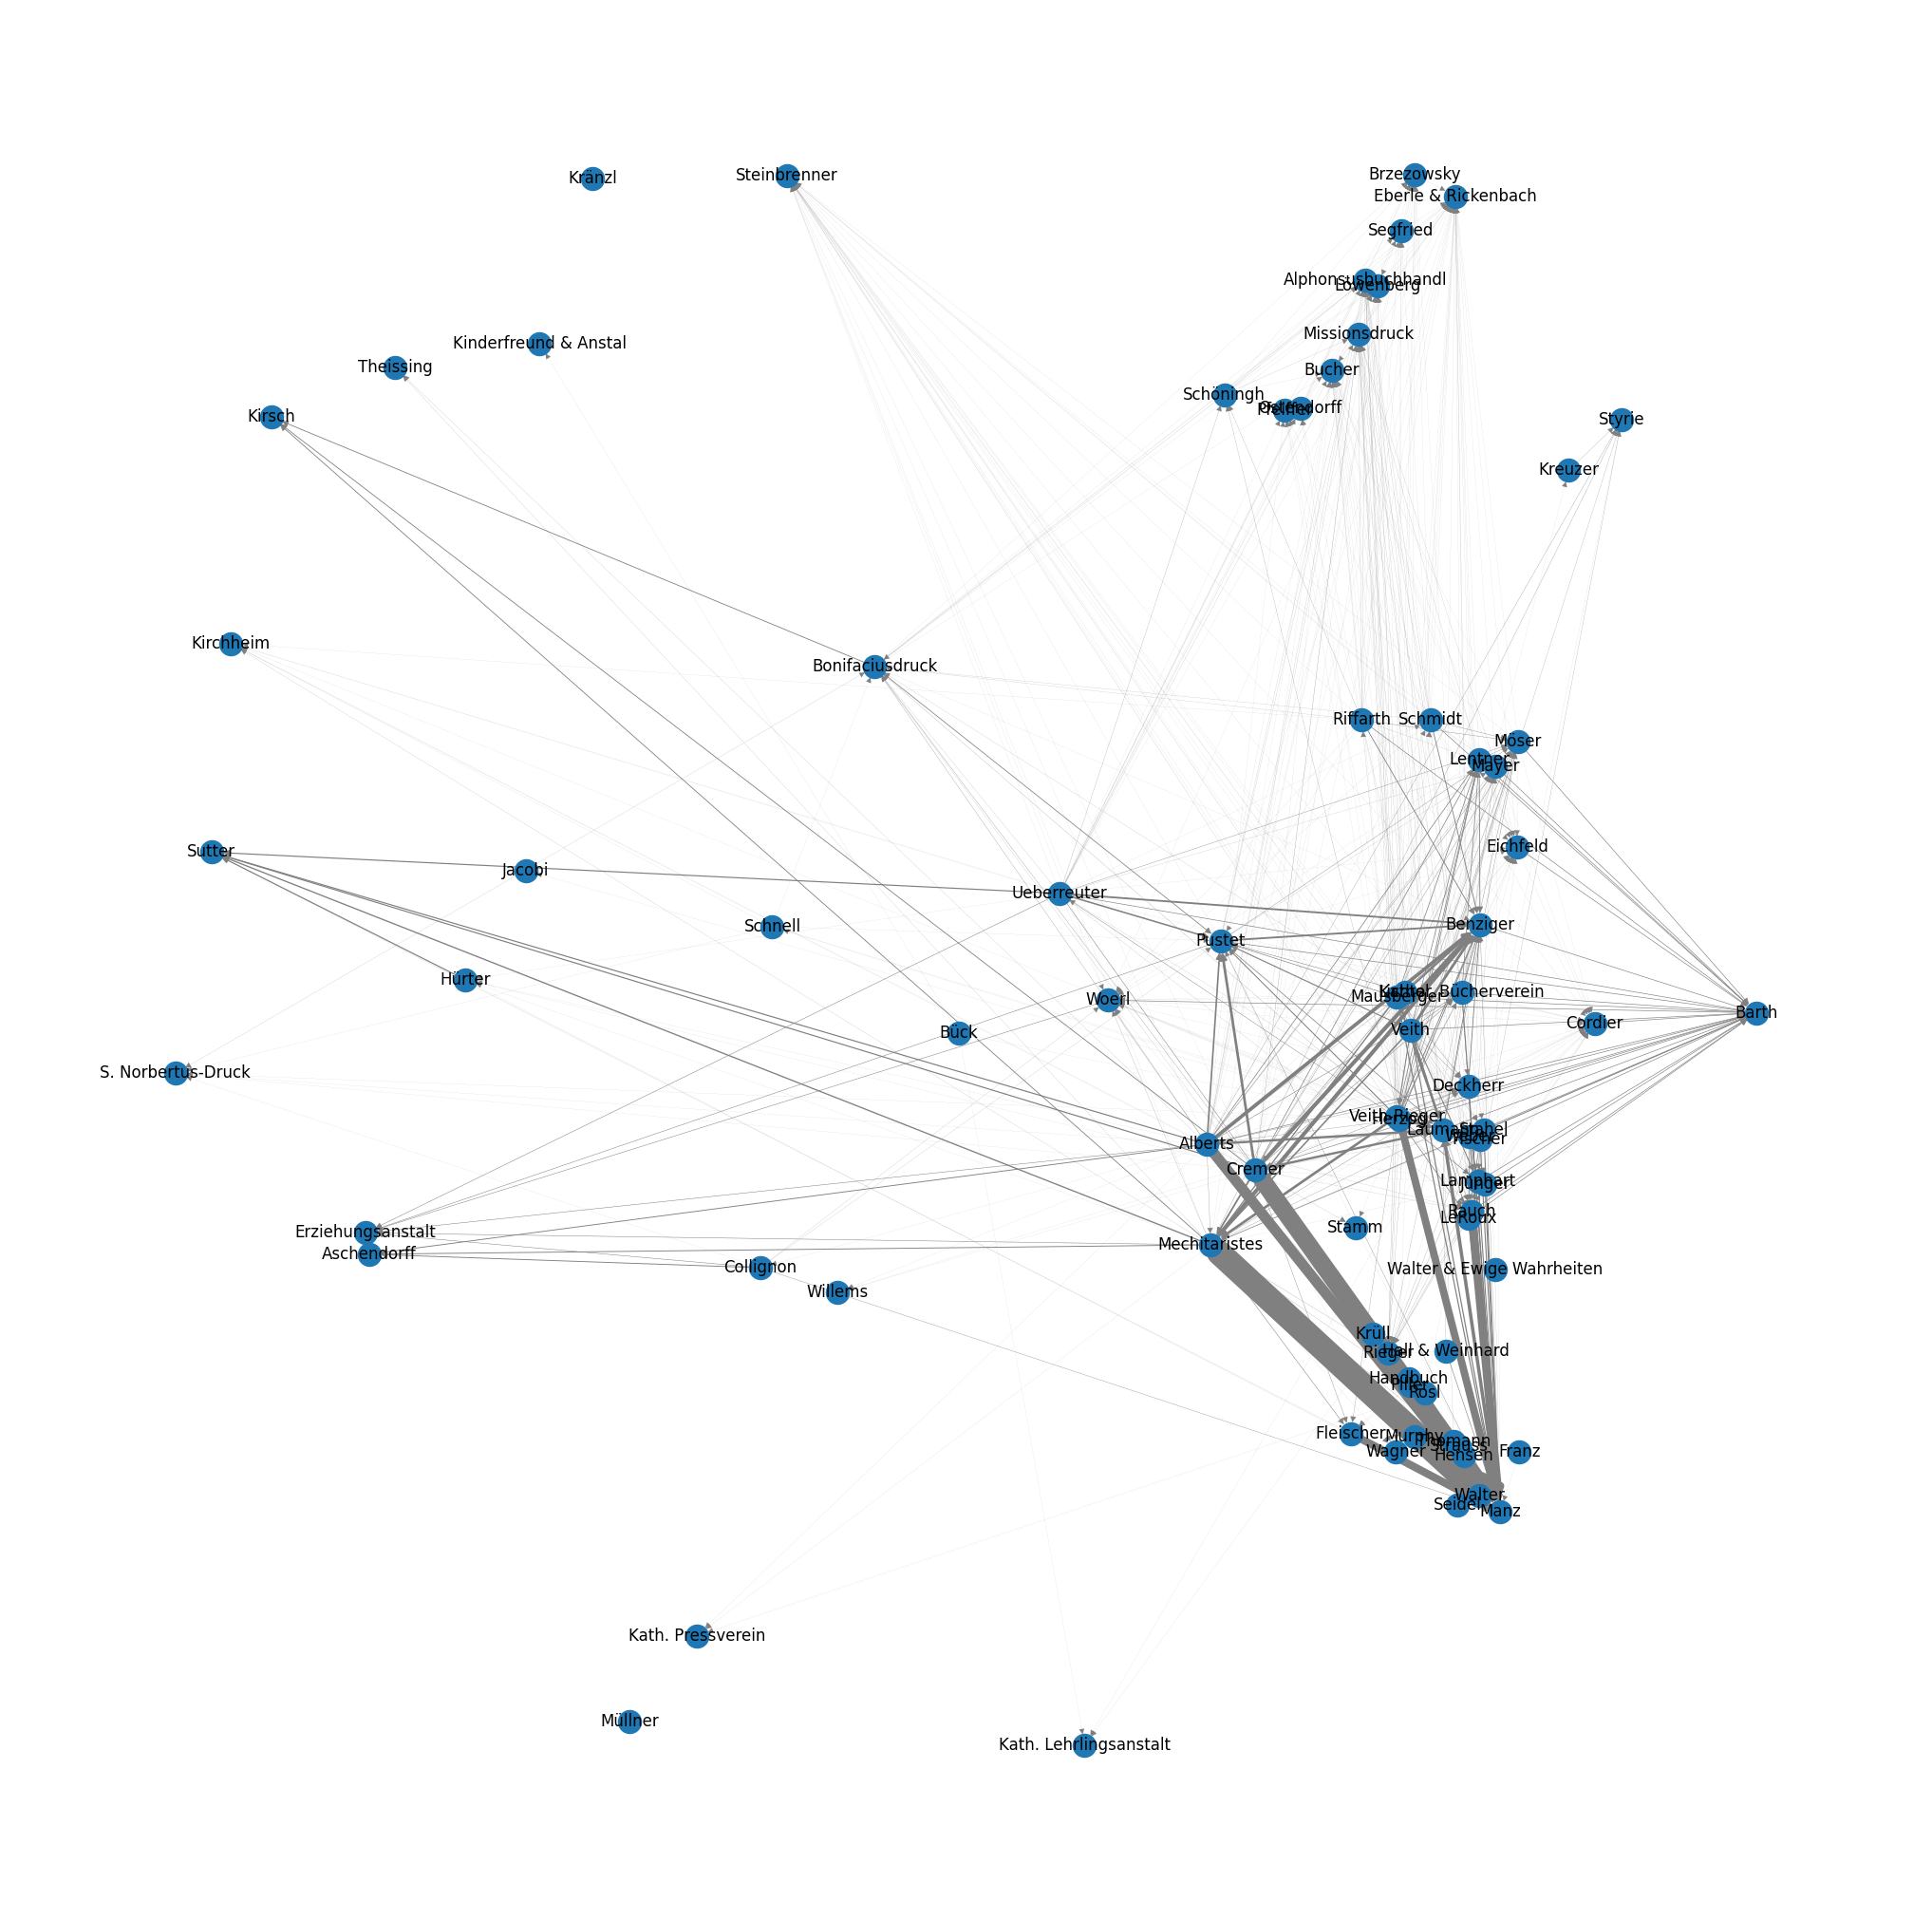

In [57]:
fig, ax = plt.subplots(figsize=(26, 26))

pos = nx.spring_layout(G_combined)

edge_widths = [data['weight'] / 20 for _, _, data in G_combined.edges(data=True)]

nx.draw(
    G_combined, pos, with_labels=True, width=edge_widths,
    edge_color='gray', arrows=True, ax=ax
)

plt.savefig('Pietra_Margento_19th_Cent_Liguori_GER_graph.png')

plt.show()

In [58]:
plt.close()

In [60]:
import numpy as np

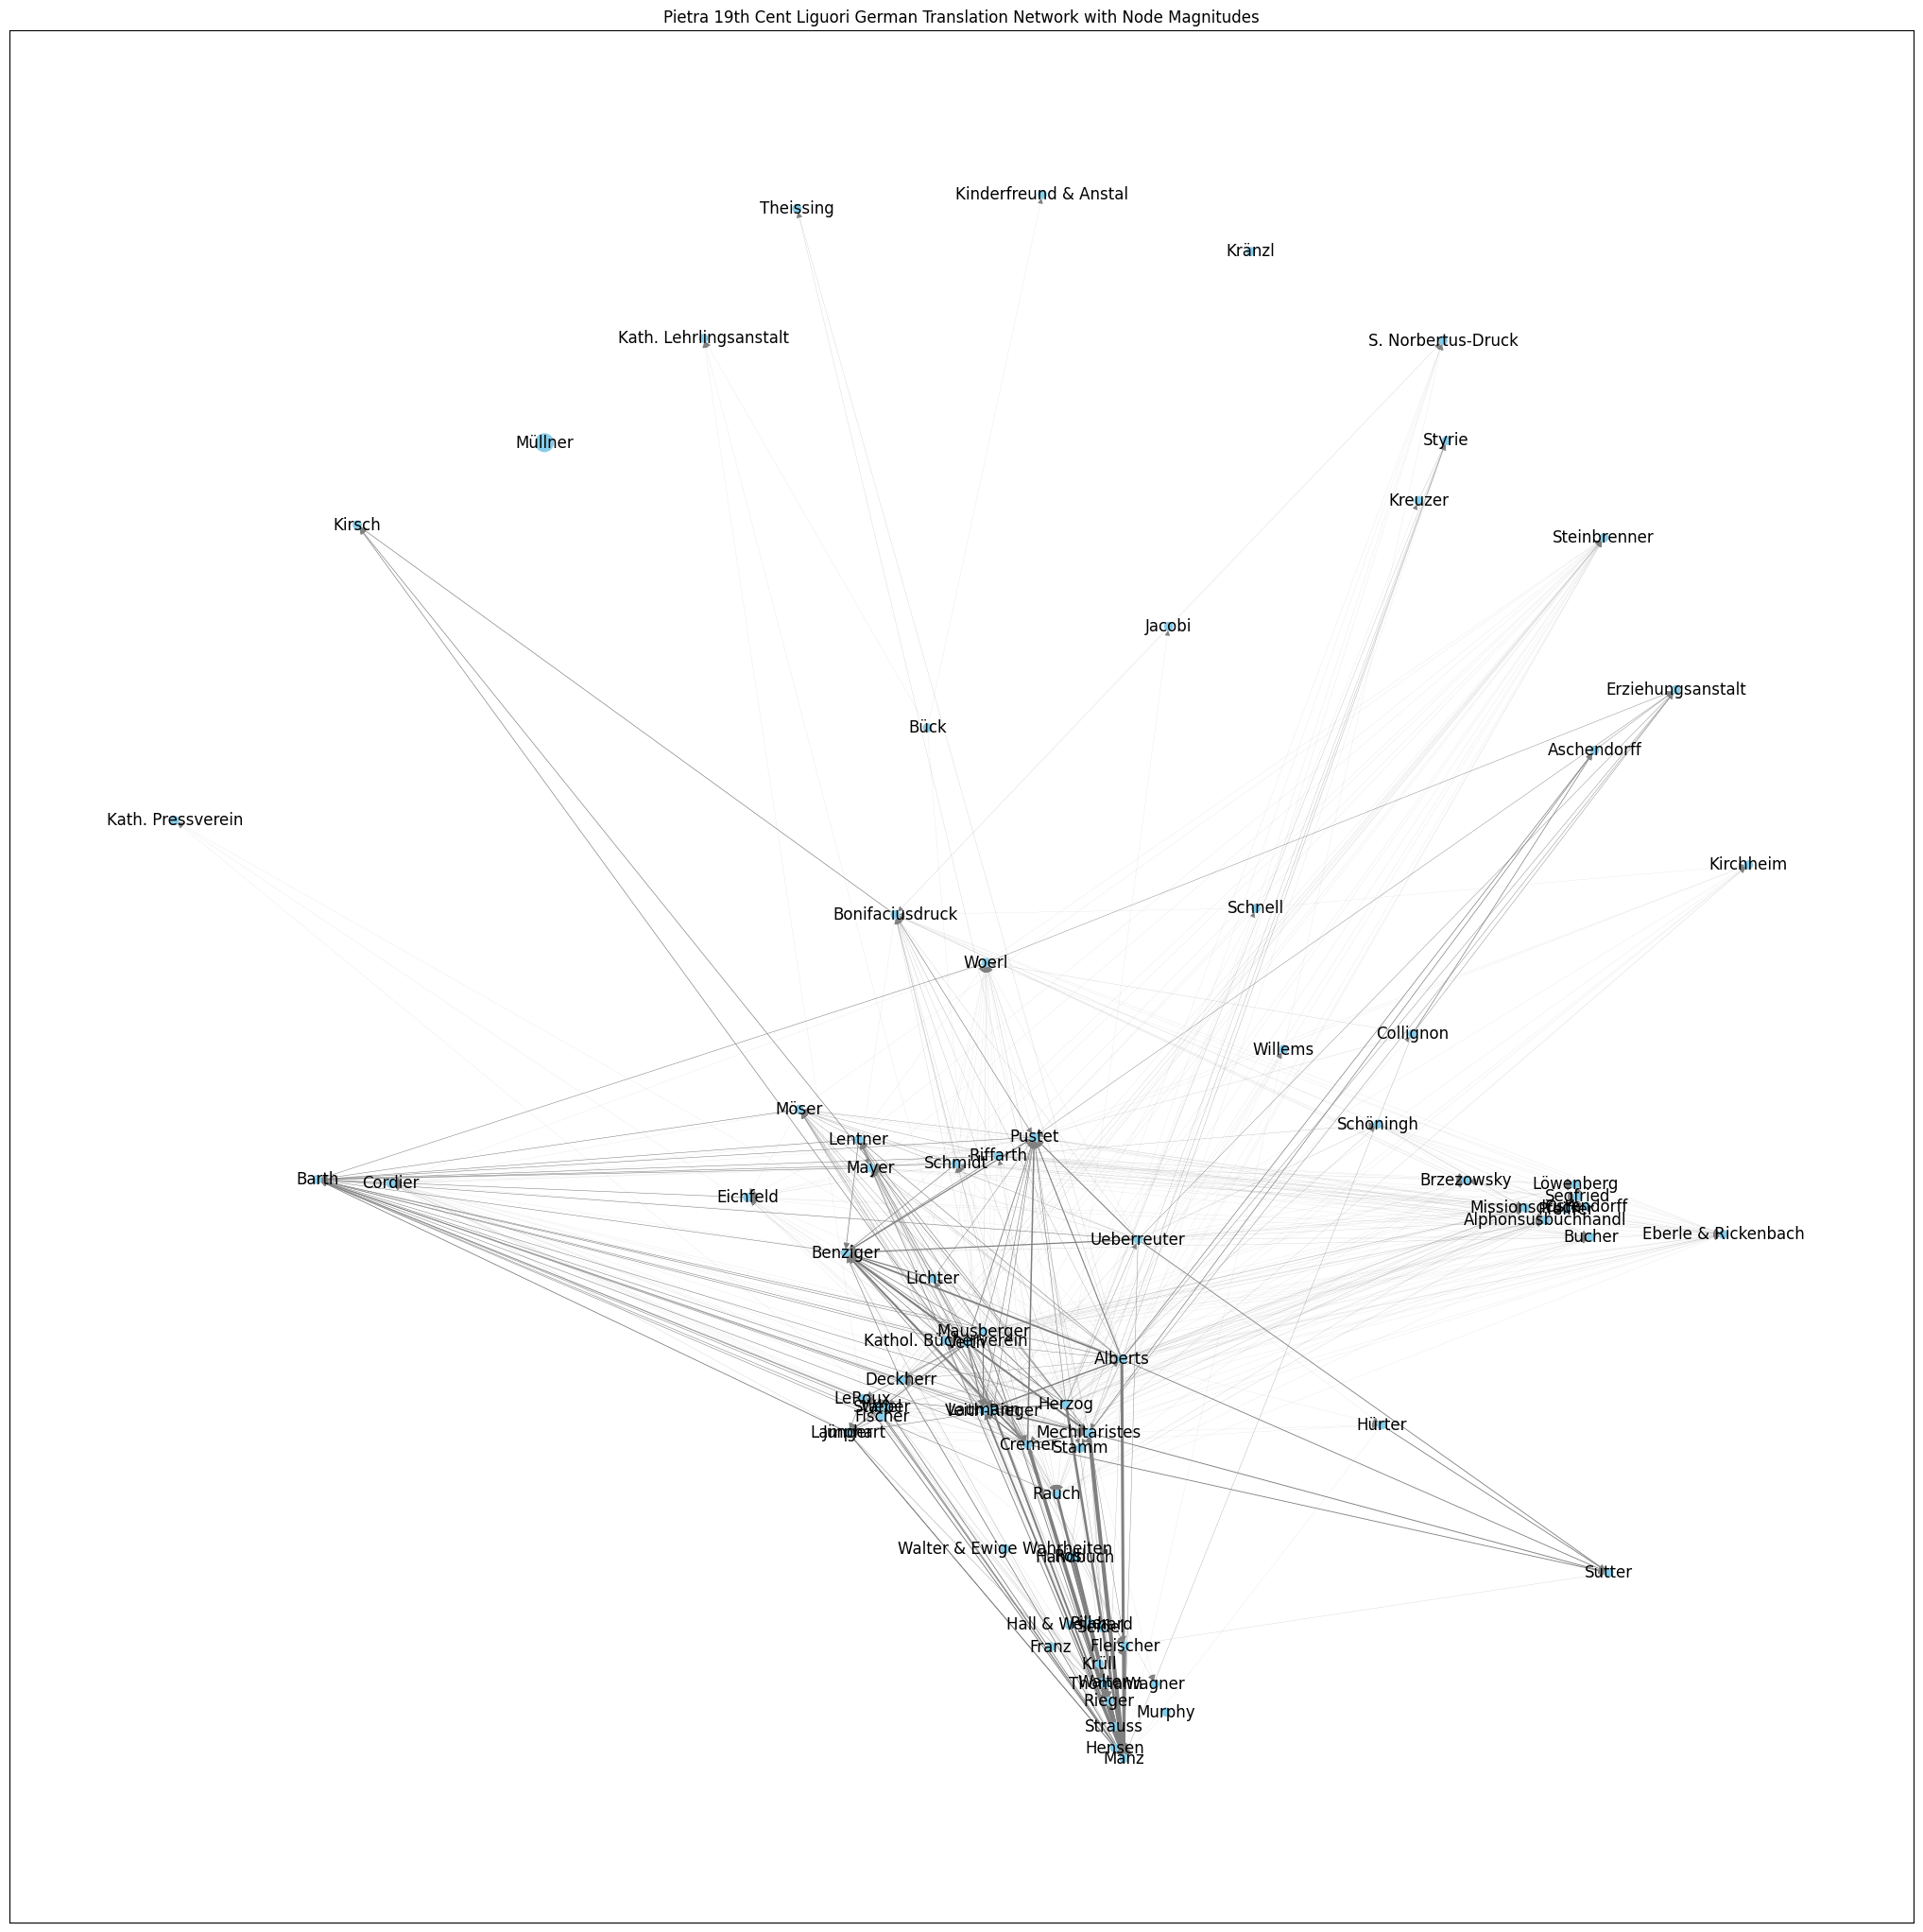

In [61]:
fig, ax = plt.subplots(figsize=(26, 26))

node_sizes = [G_combined.nodes[node].get('magnitude', 1) for node in G_combined.nodes()]

# Scale node sizes for better visualization (adjust scaling factor as needed)
node_sizes = [size * 36 for size in node_sizes]

pos = nx.spring_layout(G_combined)

edge_widths = [np.log(data['weight'] / 20 + 1) for _, _, data in G_combined.edges(data=True)]


nx.draw_networkx(G_combined, pos, node_size=node_sizes, with_labels=True,
        alpha=1, node_color='skyblue', width=edge_widths, edge_color='gray', arrows=True)

plt.title("Pietra 19th Cent Liguori German Translation Network with Node Magnitudes")

plt.savefig('Pietra_Margento_19th_Cent_Liguori_GER_w_Node_Magnitudes.png')

plt.show()

In [62]:

main_component = max(nx.weakly_connected_components(G_combined), key=len)
G_main = G_combined.subgraph(main_component)

In [63]:

node_sizes1 = [G_main.nodes[node].get('magnitude', 1) for node in G_main.nodes()]

node_sizes1 = [size * 36 for size in node_sizes1]

In [64]:
plt.close()

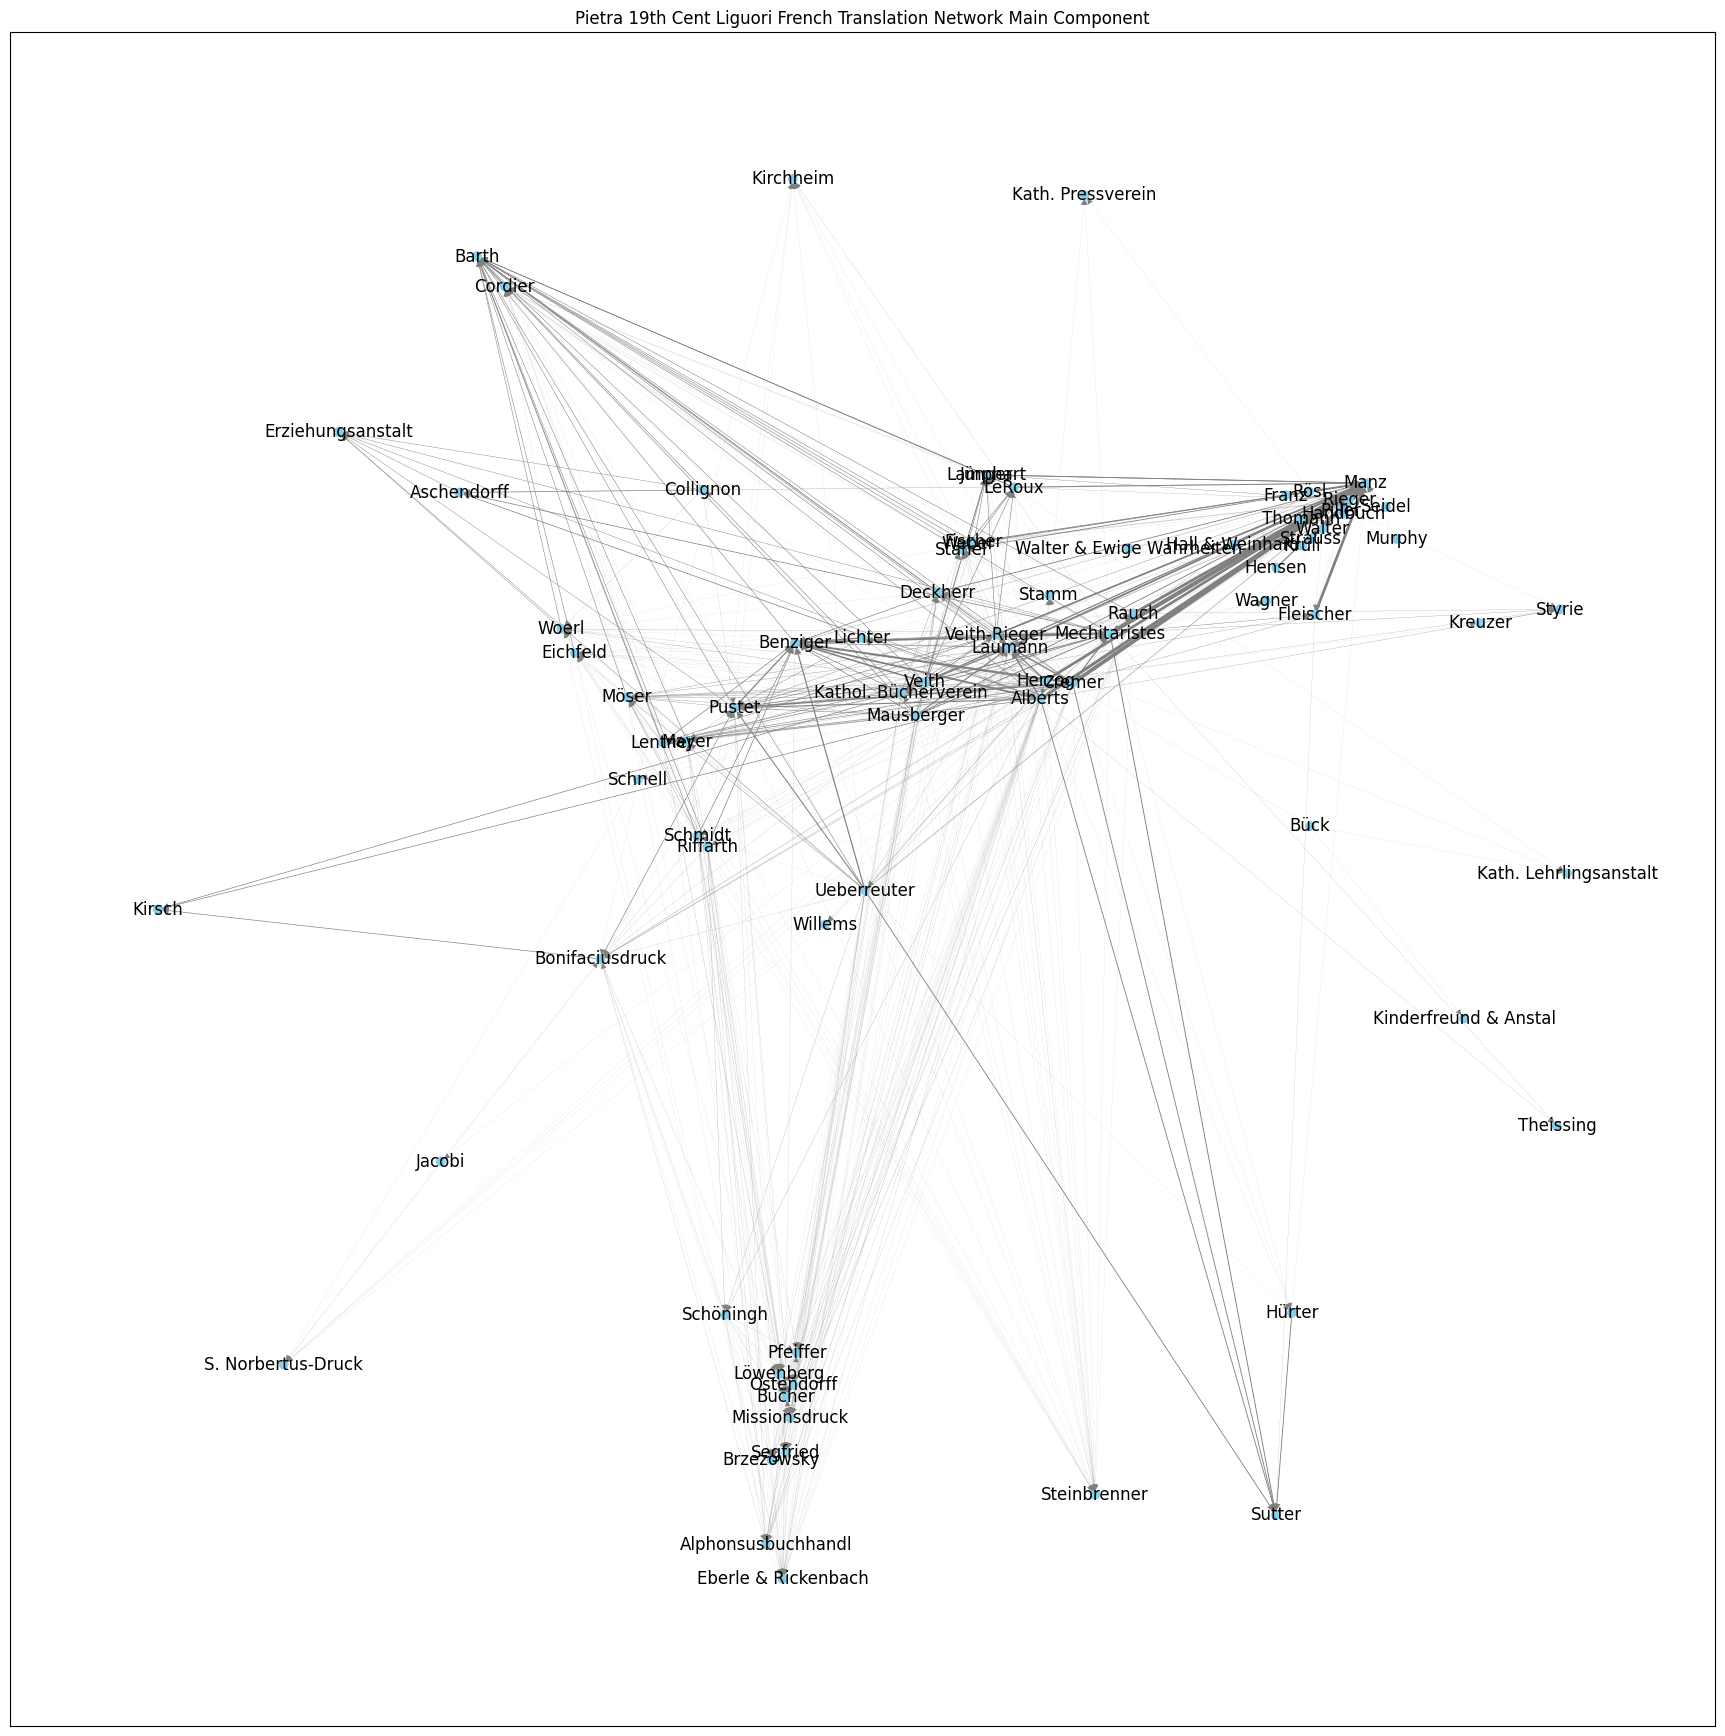

In [65]:
fig, ax = plt.subplots(figsize=(22, 22))

pos = nx.spring_layout(G_main)

edge_widths1 = [np.log(data['weight'] / 20 + 1) for _, _, data in G_main.edges(data=True)]

nx.draw_networkx(G_main, pos, node_size=node_sizes1, with_labels=True,
        alpha=1, node_color='skyblue', width=edge_widths1, edge_color='gray', arrows=True)

plt.title("Pietra 19th Cent Liguori French Translation Network Main Component")

plt.savefig('Pietra_Margento_19th_Cent_Liguori_FR_Main_Component.png')

plt.show()

In [66]:
degree_centrality = nx.degree_centrality(G_main)
top_nodes = sorted(degree_centrality, key=degree_centrality.get, reverse=True)[:20]

In [67]:
G_main_component_dense_region = G_main.subgraph(top_nodes)

In [68]:
plt.close()

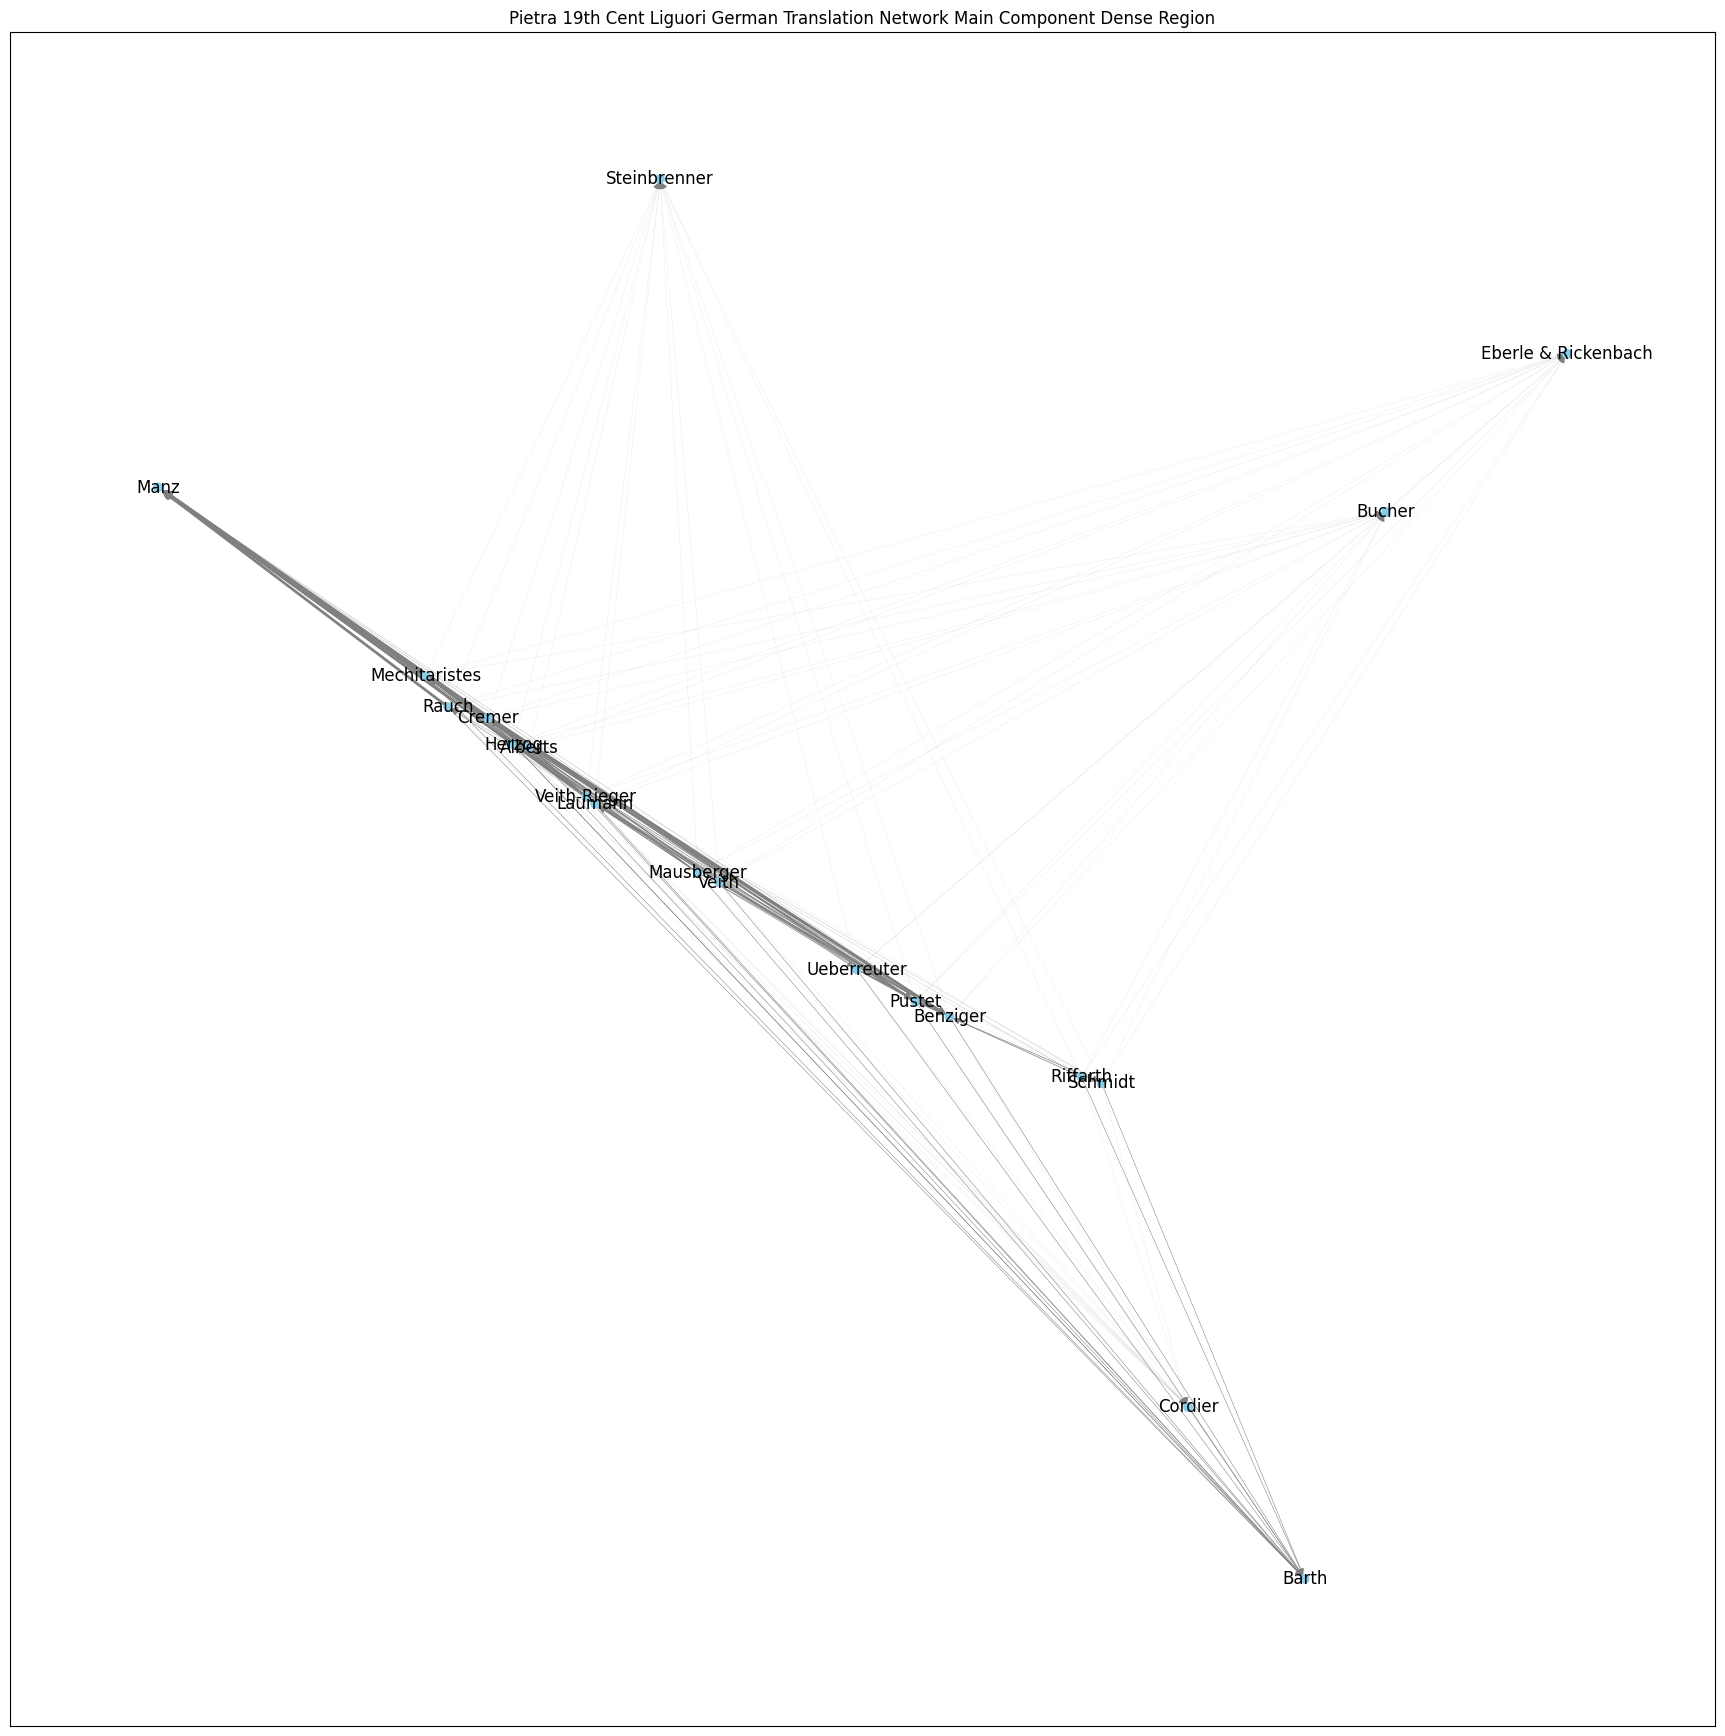

In [69]:

fig, ax = plt.subplots(figsize=(22, 22))

pos = nx.spring_layout(G_main_component_dense_region)

node_sizes2 = [G_main_component_dense_region[node].get('magnitude', 1) for node in G_main_component_dense_region.nodes()]

node_sizes2 = [size * 36 for size in node_sizes2]

edge_widths2 = [np.log(data['weight'] / 20 + 1) for _, _, data in G_main_component_dense_region.edges(data=True)]

nx.draw_networkx(G_main_component_dense_region, pos, node_size=node_sizes2, with_labels=True,
        alpha=1, node_color='skyblue', width=edge_widths2, edge_color='gray', arrows=True)

plt.title("Pietra 19th Cent Liguori German Translation Network Main Component Dense Region")

plt.savefig('Pietra_Margento_19th_Cent_Liguori_GER_Main_Component_Zoom.png')

plt.show()